# **Fetch News Articles Data from APIs**

**Installing Required Libraries**

In [ ]:
!pip install requests newspaper3k textblob

**Fetching 10 Articles from API**

In [ ]:
from __future__ import unicode_literals
import requests
from newspaper import Article
from textblob import TextBlob

def GetArticles(query, secret, url, output_file='all_articles.txt'):
    """
    GetArticles function retrieves information about articles based on
    a query from a news API.
    Parameters:
    - query: The query phrase for the articles.
    - secret: Your API key for authentication.
    - url: The URL of the news API.
    - output_file: The filename to save the content of all articles.
    Returns:
    - data: A list of dictionaries containing information about each
    article.
    """
    parameters = {
        'q': query,
        'pageSize': 10,
        'apiKey': secret
    }
    # Make the request to the news API
    response = requests.get(url, params=parameters)
    # Convert the response to JSON format
    response_json = response.json()
    # Create empty list for data
    data = []
    all_articles_content = ''
    # Iterate through articles in the API response
    for i in response_json['articles']:
        article_data = {
            'Title': i["title"],
            'Authors': None,
            'Publication Date': i["publishedAt"],
            'Summary': None,
            'URL': i['url'],
            'Content': None,
            'Top Image': None,
            'Keywords/Tags': None,
            'Sentiment': None
        }
        article = Article(article_data['URL'])
        article.download()
        article.parse()
        article.nlp()
        # Update the dictionary with additional information
        article_data['Authors'] = article.authors
        article_data['Summary'] = article.summary
        article_data['Content'] = article.text
        article_data['Top Image'] = article.top_image
        article_data['Keywords/Tags'] = article.keywords
        # Perform sentiment analysis using TextBlob
        analyse = TextBlob(article.text)
        article_data['Sentiment'] = analyse.sentiment
        # Append the article data to the list
        data.append(article_data)
        # Concatenate the content for all articles
        all_articles_content += article.text + '\n\n'
    # Save the content of all articles to a single text file
    save_to_text_file(output_file, all_articles_content)
    return data

def save_to_text_file(filename, content):
    """
    Save content to a text file.
    Parameters:
    - filename: The filename to save to.
    - content: The content to save.
    """
    with open(filename, 'w', encoding='utf-8') as file:
        file.write(content)


In [ ]:
import nltk
nltk.download('punkt')
query = 'Brexit News UK'  # Replace with the topic you're interested in
api_key = 'bca996d07c1842d7846eb24ae94d8bea'
api_url = 'https://newsapi.org/v2/everything?'

articles_data = GetArticles(query, api_key, api_url)

# Example: Print the extracted data for each article
for article_data in articles_data:
    print("\nArticle:")
    for key, value in article_data.items():
        print(f"{key}: {value}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Article:
Title: The Papers: EU olive branch and PM targets 'sick note culture'
Authors: []
Publication Date: 2024-04-19T00:10:56Z
Summary: And a man from Berkshire has been recounting an extraordinary interaction with Royal Mail to the Daily Telegraph.
When he opened the envelope he found it was a birthday card from his sister for the boy's first birthday.
Royal Mail said it "could not speculate" on why the letter wasn't delivered for almost a decade.
Mr Wilson was refunded £10.80 and given a book of eight stamps.
Alfie was given a £10 cheque to buy himself something as a gesture of goodwill.
URL: https://www.bbc.co.uk/news/blogs-the-papers-68851786
Content: And a man from Berkshire has been recounting an extraordinary interaction with Royal Mail to the Daily Telegraph. Richard Wilson, from Reading, was intrigued to receive delivery of a birthday card for his son, Alfie - but first had to pay £2.50 because it was posted with a stamp "no longer valid for purpose". When he opened the en

# Cleaning and Preprocessing Articles

**Cleaning and Preprocessing on all 10 articles**

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download necessary NLTK resources if they haven't been downloaded yet
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def clean_text(text):
    """
    Function to preprocess text data by lowering case, removing punctuation,
    eliminating stopwords, and lemmatizing words.
    """
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# Apply cleaning and preprocessing to each article's content
for article in articles_data:
    article['Cleaned Content'] = clean_text(article['Content'])

# Example: Print the cleaned data for each article
for article in articles_data:
    print("\nArticle:")
    for key, value in article.items():
        if key == 'Cleaned Content' or key == 'Content':  # Optionally print original content for comparison
            print(f"{key}: {value[:500]}")  # Print first 500 characters to avoid too long output


Article:
Content: And a man from Berkshire has been recounting an extraordinary interaction with Royal Mail to the Daily Telegraph. Richard Wilson, from Reading, was intrigued to receive delivery of a birthday card for his son, Alfie - but first had to pay £2.50 because it was posted with a stamp "no longer valid for purpose". When he opened the envelope he found it was a birthday card from his sister for the boy's first birthday. However, Alfie is now nine. Royal Mail said it "could not speculate" on why the let
Cleaned Content: man berkshire recounting extraordinary interaction royal mail daily telegraph richard wilson reading intrigued receive delivery birthday card son alfie first pay £250 posted stamp longer valid purpose opened envelope found birthday card sister boy first birthday however alfie nine royal mail said could speculate letter wasnt delivered almost decade mr wilson refunded £1080 given book eight stamp alfie given £10 cheque buy something gesture goodwill

Article:


# **Descriptive Analysis of the collected articles**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
def plot_histogram(data, title, xlabel, ylabel):
    """
    Helper function to plot histograms.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=20, color='blue', alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# Convert article data to DataFrame for easier analysis
articles_df = pd.DataFrame(articles_data)

# Convert 'Publication Date' to datetime format
articles_df['Publication Date'] = pd.to_datetime(articles_df['Publication Date'])

**Publication time distribution visualization**

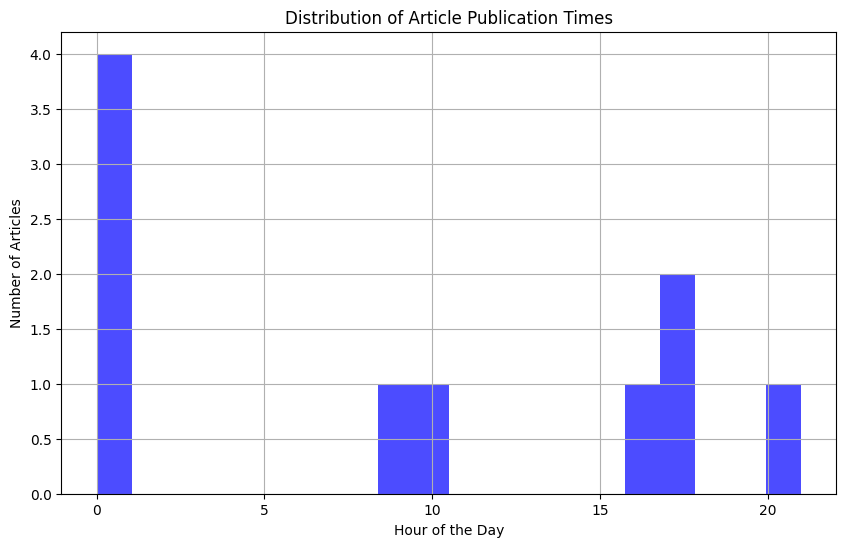

In [ ]:
# Analyze publication time distribution
articles_df['Publication Hour'] = articles_df['Publication Date'].dt.hour
plot_histogram(articles_df['Publication Hour'], 'Distribution of Article Publication Times', 'Hour of the Day', 'Number of Articles')

**Word Count Analysis distribution visualization**

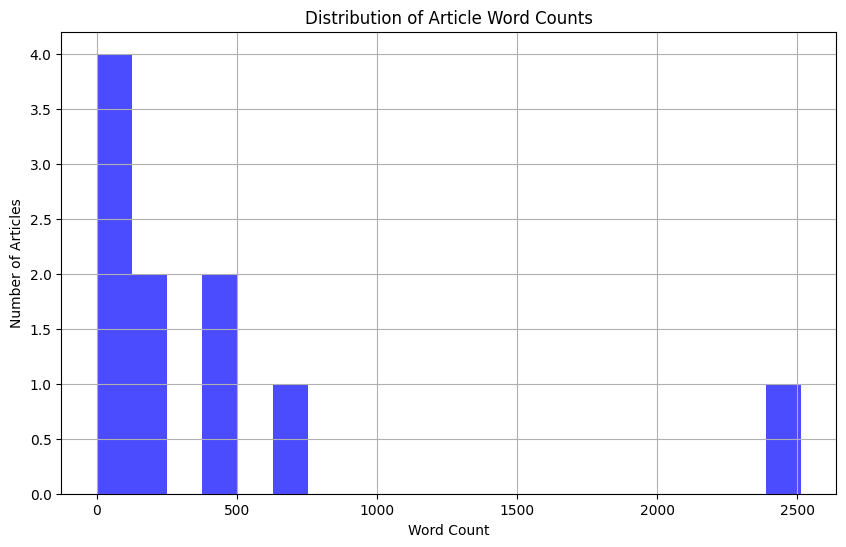

In [ ]:
# Word count analysis
articles_df['Word Count'] = articles_df['Cleaned Content'].apply(lambda x: len(x.split()))
plot_histogram(articles_df['Word Count'], 'Distribution of Article Word Counts', 'Word Count', 'Number of Articles')

**Count number of articles by authors if available**

In [ ]:
# Additional descriptive analysis
# Count number of articles by authors if available
if 'Authors' in articles_df.columns:
    authors_list = [author for sublist in articles_df['Authors'].dropna() for author in sublist]
    author_counts = Counter(authors_list)
    # Print the 10 most common authors
    print("Most common authors and their article counts:")
    for author, count in author_counts.most_common(10):
        print(f"{author}: {count}")


Most common authors and their article counts:
The Week Uk: 2
The Week Staff: 2
Adrienne Wyper: 2
Harriet Marsden: 2
Chas Newkey-Burden: 2
Sorcha Bradley: 2
Lambert Strether: 1
Yves Smith: 1
Nick Corbishley: 1
Arion Mcnicoll: 1


**Analyze sentiment scores if available**

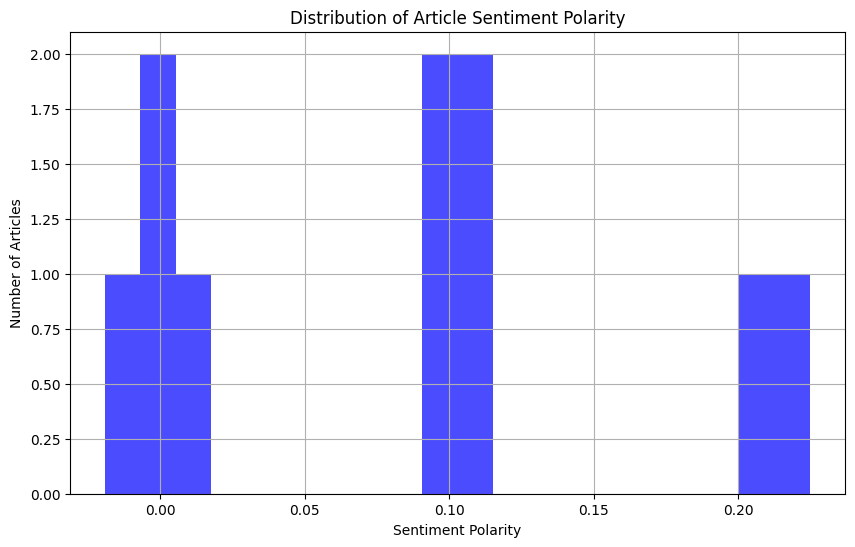

Mean Sentiment Polarity: 0.08


In [ ]:
# Optional: Analyze sentiment scores if available
if 'Sentiment' in articles_df.columns:
    # Plot sentiment polarity
    sentiments = [sent.polarity for sent in articles_df['Sentiment'] if sent is not None]
    plot_histogram(sentiments, 'Distribution of Article Sentiment Polarity', 'Sentiment Polarity', 'Number of Articles')
    # Mean sentiment polarity
    mean_sentiment = sum(sentiments) / len(sentiments)
    print(f"Mean Sentiment Polarity: {mean_sentiment:.2f}")

# **LDA Topic Modeling techniques to discover key topics**

In [ ]:
# Install pyLDAvis using pip
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 6.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis  # Ensure the correct import based on your gensim version
import gensim

In [ ]:
# Assuming the articles_df is already loaded and contains 'Cleaned Content'
# Preparation of text data for LDA
texts = [doc.split() for doc in articles_df['Cleaned Content'].dropna() if doc.strip() != '']

# Check if texts are empty
if not texts:
    raise ValueError("Preprocessed texts are empty. Check your data and preprocessing steps.")

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(texts)

# Reduce the aggressiveness of filter_extremes
dictionary.filter_extremes(no_below=5, no_above=0.7)  # Adjust these numbers based on your dataset

# Check if dictionary is empty
if len(dictionary) == 0:
    raise ValueError("No terms found. Consider adjusting filter_extremes parameters.")

# Convert dictionary to a bag of words corpus
corpus = [dictionary.doc2bow(text) for text in texts]

# Check if corpus is empty
if not corpus:
    raise ValueError("Corpus is empty. Check your texts and dictionary.")

# Applying the LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15, random_state=42)

# Visualization using pyLDAvis
pyLDAvis.enable_notebook()
lda_display = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Word Cloud visualization for LDA Model**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


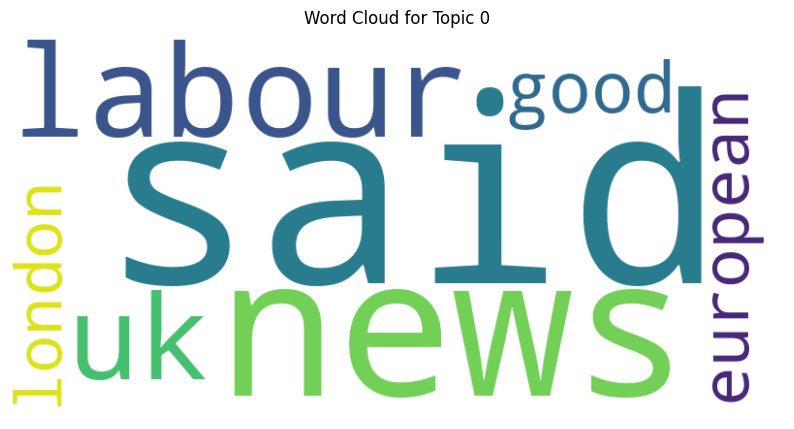

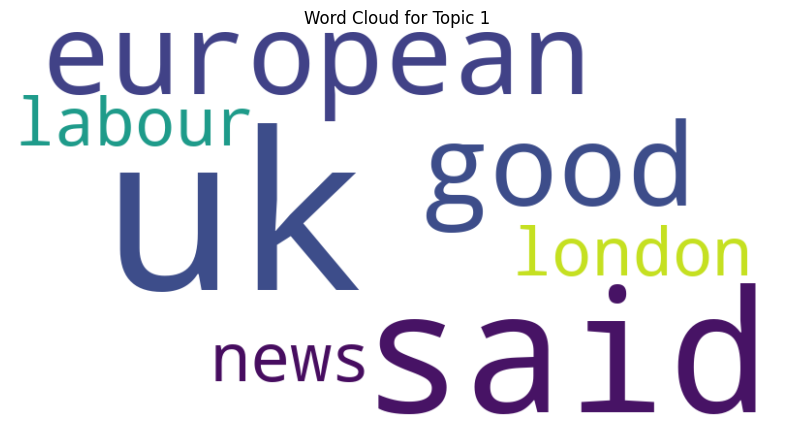

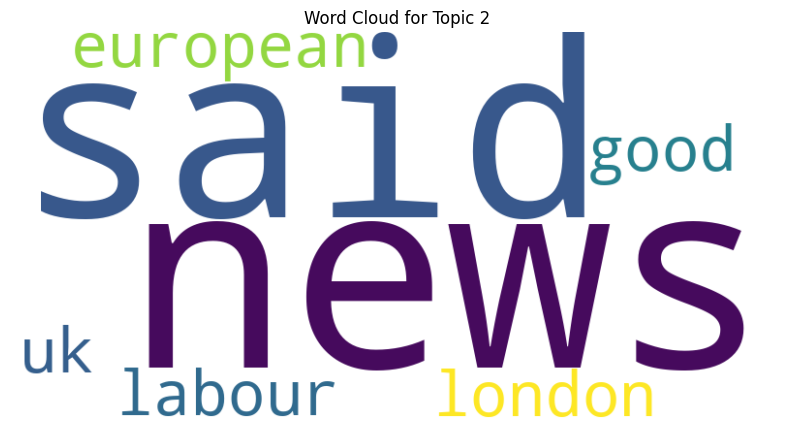

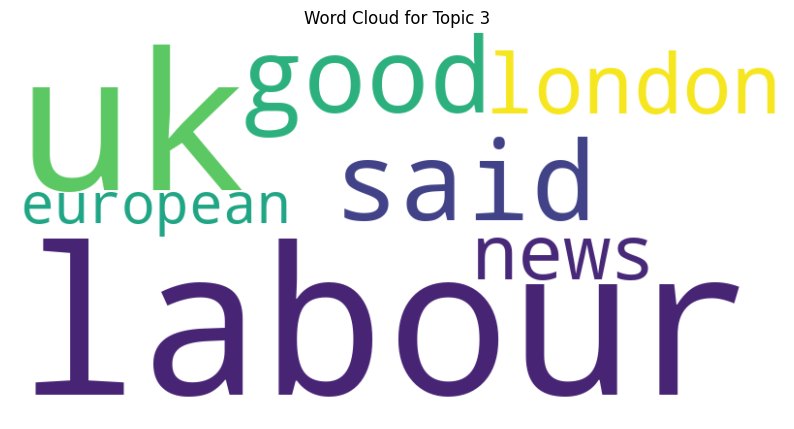

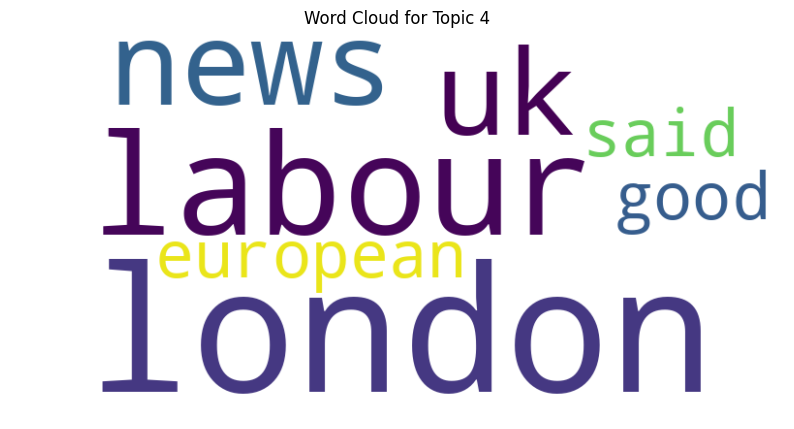

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_word_cloud(topic_num, lda_model, dictionary):
    """
    Function to plot a word cloud for a given topic.

    Parameters:
    - topic_num: The topic number to visualize.
    - lda_model: The trained LDA model.
    - dictionary: The Gensim dictionary object used for LDA.
    """
    plt.figure(figsize=(10, 7))

    # Extract the terms and their weights
    terms = dict(lda_model.show_topic(topic_num, 200))
    cloud = WordCloud(background_color='white', width=800, height=400)
    cloud.generate_from_frequencies(terms)

    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Topic {topic_num}')
    plt.show()

# Assuming lda_model and dictionary are already defined from your LDA analysis
num_topics = 5  # Adjust this if you have a different number of topics
for i in range(num_topics):
    plot_word_cloud(i, lda_model, dictionary)


# **LSA Topic Modeling techniques to discover key topics**

In [ ]:
import pandas as pd
from gensim import corpora, models
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' 

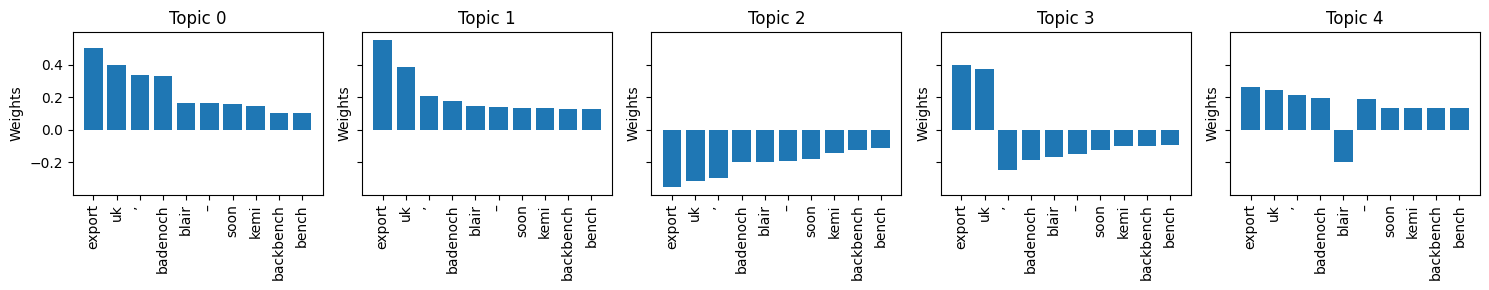

In [ ]:
# Load your DataFrame, assuming 'articles_df' with a column 'Cleaned Content'
texts = [doc.split() for doc in articles_df['Cleaned Content'].dropna() if doc.strip() != '']

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Performing LSA Topic Modeling
lsi_model = models.LsiModel(corpus, id2word=dictionary, num_topics=5)  # Adjust num_topics as necessary

# Visualize topics using matplotlib
fig, axes = plt.subplots(1, 5, figsize=(15, 3), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_terms = dict(lsi_model.show_topic(i, 10))
    ax.bar(range(len(topic_terms)), list(topic_terms.values()), tick_label=list(topic_terms.keys()))
    ax.set_title('Topic ' + str(i))
    ax.set_ylabel('Weights')
    plt.xticks(rotation=90)
fig.tight_layout()
plt.show()

**Word Cloud for LSA Model Results**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


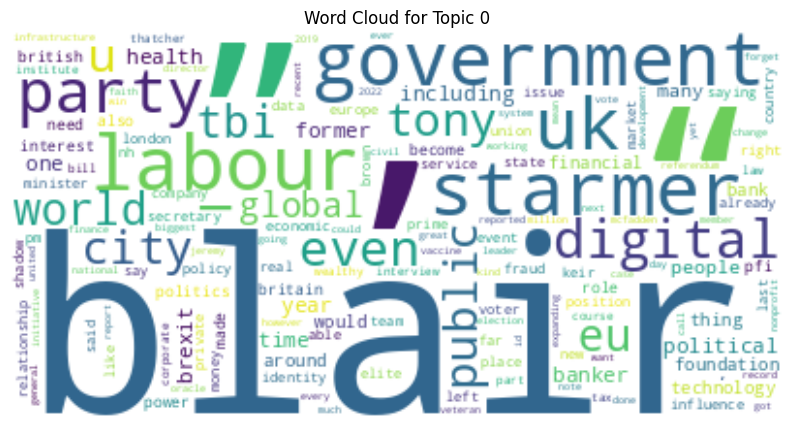

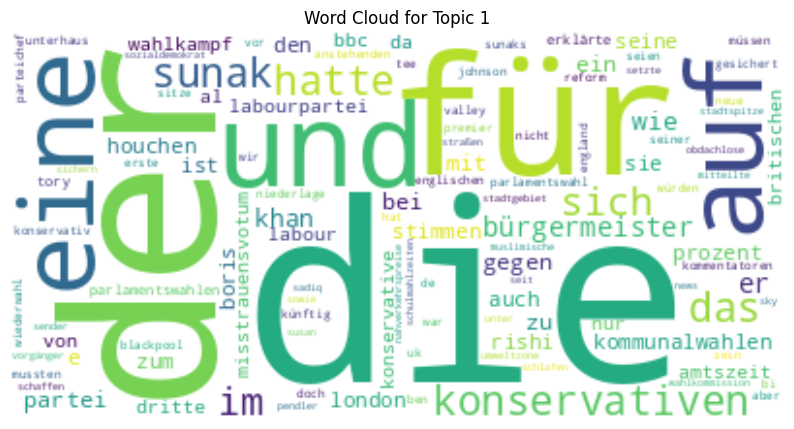

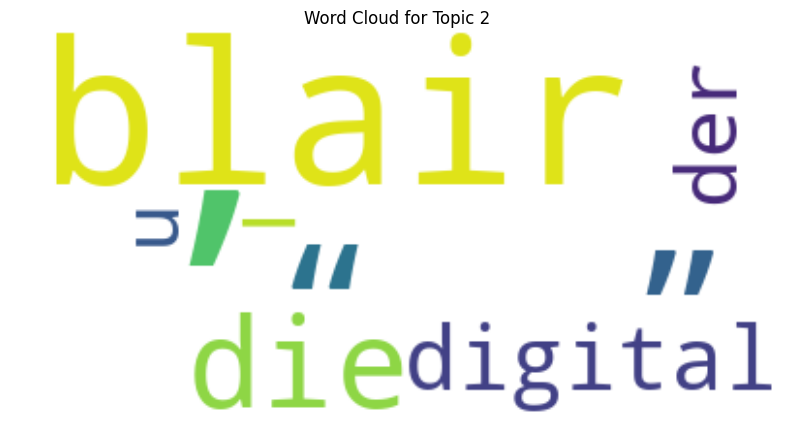

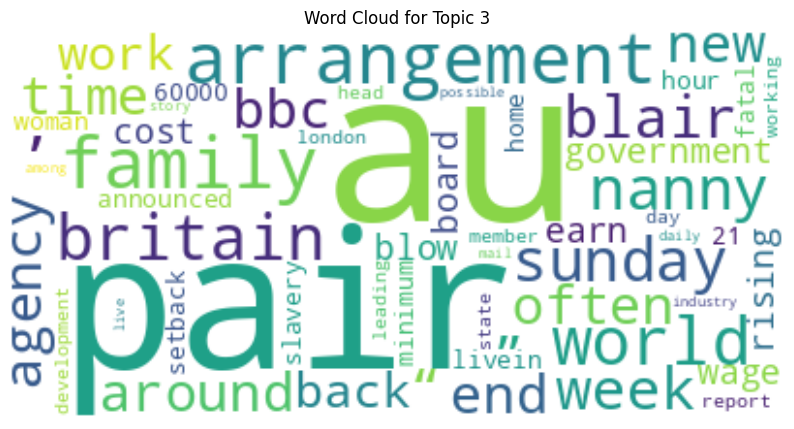

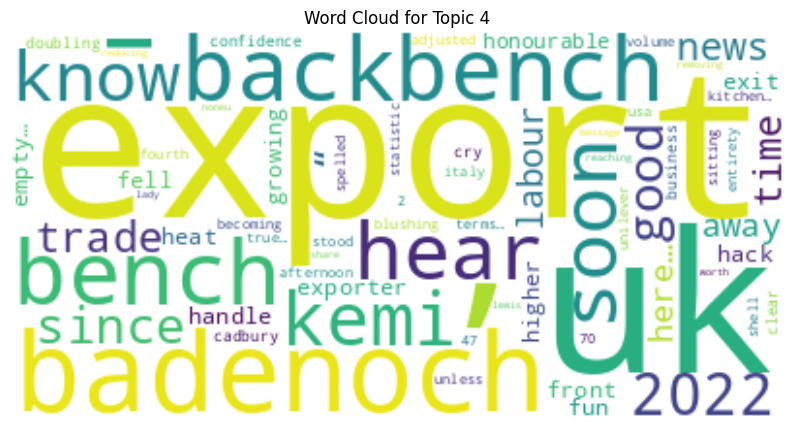

In [ ]:
# Function to plot word cloud for each topic
def plot_word_cloud(topic_num, lsi_model, dictionary):
    terms = dict(lsi_model.show_topic(topic_num, 200))
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(terms)
    plt.figure(figsize=(10, 7))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Topic {topic_num}')
    plt.show()

# Generate word clouds for each topic
for i in range(lsi_model.num_topics):
    plot_word_cloud(i, lsi_model, dictionary)

# **Summarization of one of the Article**

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
import heapq

nltk.download('punkt')
nltk.download('stopwords')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Checking which article is lenghty for summarization task**

In [ ]:
#Original Article
sample_article_text = articles_df['Content'].iloc[3]  # Get the text of the first article
sample_article_text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Blair is closer than ever to regaining political power, albeit through a proxy Labour government led by Keir Starmer. The beauty (for Blair) is that he will be able to continue expanding his global political consulting empire at the same time.\n\nOne of the great contradictions of British political life over the past 15 years is Sir Tony Blair. The three-term prime minister is broadly reviled by the British public, even among many Labour Party voters, yet he continues to be feted and fawned over by the British establishment and media. Even after the “crushing verdict” (in The Guardian‘s words) of the Chilcott Inquiry — that the Blair government’s case for the Iraq war was “deficient” — was finally made public in 2016, Blair remained a go-to person for the British and international media on all manner of topics, particularly the COVID-19 pandemic.\n\nIt is a very different story for the British public. In a recent YouGov opinion poll, only 22% of respondents said Blair had had a positi

In [ ]:
# Count the total number of words
word_count = len(sample_article_text.split())

print("Total number of words in the article:", word_count)

Total number of words in the article: 3933


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def summarize_article(text, num_sentences=5):
    """
    Summarize the article by extracting key sentences based on word frequencies.

    Parameters:
    - text: Full text of the news article.
    - num_sentences: Number of sentences to include in the summary.

    Returns:
    - summary: A summary of the article.
    """
    # Tokenize the text into sentences
    sentences = sent_tokenize(text)
    # Remove stopwords and tokenize words
    stop_words = set(stopwords.words('english'))
    word_frequencies = {}
    for word in word_tokenize(text.lower()):
        if word not in stop_words and word.isalpha():
            if word not in word_frequencies:
                word_frequencies[word] = 1
            else:
                word_frequencies[word] += 1

    # Calculate weighted frequency of occurrence
    maximum_freq = max(word_frequencies.values())
    for word in word_frequencies.keys():
        word_frequencies[word] = (word_frequencies[word] / maximum_freq)

    # Scoring sentences by weighted frequencies of words in them
    sentence_scores = {}
    for sent in sentences:
        for word in word_tokenize(sent.lower()):
            if word in word_frequencies:
                if sent not in sentence_scores:
                    sentence_scores[sent] = word_frequencies[word]
                else:
                    sentence_scores[sent] += word_frequencies[word]

    # Selecting the top-n sentences with the highest scores
    summary_sentences = heapq.nlargest(num_sentences, sentence_scores, key=sentence_scores.get)
    summary = ' '.join(summary_sentences)
    return summary

# Assuming 'articles_df' is your DataFrame and it contains a column 'Content'
sample_article_text = articles_df['Content'].iloc[3]  # Get the text of the first article

# Generate summary
article_summary = summarize_article(sample_article_text, num_sentences=5)
print("\nSummarized Article:", article_summary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Summarized Article: A recent feature article in the London Times, titled “Tony Blair: Politics Is for the Weird and the Wealthy”, provides a glimpse of just how much influence Blair and TBI are likely to wield during a Starmer government:

Starmer, who shared a stage with Blair at the TBI’s Future of Britain conference last summer, has populated his team with Blairites — including the former Blair special adviser Matthew Doyle, now Starmer’s director of communications; the former Blair strategist and speechwriter Peter Hyman, who is a senior adviser; and another former Blair special adviser, Peter Kyle, now the shadow science secretary. TBI was spawned in 2017 by rolling together all of Blair’s for-profit and non-profit ventures, including the Tony Blair Faith Foundation, the Tony Blair Sports Foundation, the Tony Blair Governance Initiative, and his consulting firm Tony Blair Associates, into one vehicle. Starmer is favourite to win not because of a groundswell of support for his vis

In [ ]:
# Count the total number of words
word_count = len(article_summary.split())

print("Total number of words in the article:", word_count)

Total number of words in the article: 333


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
